# Machine Learning


## Student
* Student Name:
* Student ID:

### Rules
1. This is a take-home exam.
2. You are expected to complete and submit the exam by 27 - May - 2020, 15:00 GMT
   + No late submissions will be allowed.
   + Submit your exam through canvas.
3. The exam is in English and you are expected to complete it in English.
4. The exam requires coding and you are expected to code in Python 3.0.
5. The exam is worth 100 points, and it will constitute 50% of your grade.
6. To pass the course you need to obtain at least 50 points in this exam (and a 5.5 overall course grade)
7. The exam describes a problem you will need to solve.
8. This is an open-ended problem, which means that
   + there is no single perfect solution, however 
   + there are still correct and incorrect things one may do, and
   + there are certain best practices to follow.
9. You are expected to complete this exam on your own. 
   + You are not allowed to discuss or share the exam, or share your solutions with anyone else.
   + We run a plagiarism check both against the web and against all submitted exams. 
   + There are different ways to work on this problem. It would really be a coincidence if 2 students choose very similar way of solving it; if that is the case, we will take a closer look and we will invite the students to a short oral examination/discussion over their solutions.
10. We will spend approximately 15 minutes to assess your work. So make sure that everything looks clear, is neatly documented, and that everything runs.
11. You are allowed to import from the following APIs: sklearn, pandas, numpy, matplotlib, scipy, nltk. You are not allowed to use any other API.

### Instructions

1. You are provided with a dataset of Airbnb listings for apartments in Amsterdam. Download the data to the same folder as this ipynb file.
2. Each row in the listings corresponds to an appartment, and each column to an attribute/feature for that appartment.
3. One of the attributes is the *price* of the apartment. Based on the actual price listings are split into two categories, *cheap* and *expensive*, which is the value of the attribute *price*.
4. Your goal is to 
  1. classify listings into cheap and expensive by the means of machine learning, 
  2. discuss the quality of your classifier in terms of appropriate evaluation measures, using tables or plots for comparisons, and 
  3. compare it to a naive classifier.
5. You can use numerical, categorical, and textual features you think can help, or derive features of your own from existing ones,  apply the right treatment to them, and build some simple classifiers over them. You should not use the features *neighborhood*, *longitude* and *latitude* (see point 6.).
6. Two of the features are the *longitude* and the *latitude* of the apartment. Together these two numbers tell you the precise location of a listing in Amsterdam. You should use  these two numbers, but you are not allowed to use them directly. Instead, you are expected to cluster listings, based on these two numbers, into a number of clusters/neightborhoods, and use the neighborhood cluster as a feature.
7. You must demonstrate that you are constructing the best possible classifier, that is you should run all those experiments needed to persuade us that you have achieved optimal performance, using everything that you were taught by this class.
8. You are expected to explain what are you doing at every step and argue about your choices on the basis of the course.

## Exam

In [1]:
import sklearn, pandas, numpy, matplotlib, scipy, nltk

### 1. Load the dataset and make choices on how to treat it (e.g. split, balance, impute, etc.) (5 points)

*Explain what you do and why*

In [2]:
# Your code goes here

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("exam_listings.csv")  
print(len(data))
data.head()


9408


,id,listing_url,name,summary,description,experiences_offered,neighbourhood,latitude,longitude,property_type,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi I'm r...,none,Indische Buurt,52.36575,4.94142,Apartment,...,9.0,10.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,2.06
1,27886,https://www.airbnb.com/rooms/27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,Stylish and romantic houseboat on fantastic hi...,none,Westelijke Eilanden,52.38761,4.89188,Houseboat,...,10.0,10.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,2.15
2,29051,https://www.airbnb.com/rooms/29051,Comfortable single room,because of the city imposing a 4 paying guest ...,because of the city imposing a 4 paying guest ...,none,Amsterdam Centrum,52.36773,4.89151,Apartment,...,10.0,9.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,moderate,f,f,4.33
3,42970,https://www.airbnb.com/rooms/42970,Comfortable room@PERFECT location + 2 bikes,A home away from home Great location Including...,A home away from home Great location Including...,none,Amsterdam Centrum,52.36781,4.89001,Bed and breakfast,...,10.0,9.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,t,4.02
4,48076,https://www.airbnb.com/rooms/48076,Amsterdam Central and lot of space,"third floor apartment two bedrooms,bathroom,te...","third floor apartment two bedrooms,bathroom,te...",none,Grachtengordel,52.38042,4.89453,Bed and breakfast,...,10.0,9.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,t,2.00


In [3]:
# split data
x = data.loc[:, data.columns != "price"]
y = data.loc[:,data.columns == "price"]

In [4]:
x.columns

Index(['id', 'listing_url', 'name', 'summary', 'description',
       'experiences_offered', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_p

### 2. Numerical Features (15 points)
* Choose the numerical features you wish to use and pre-process them
* Train a logistic regression classifier and demonstrate its performance with the right measures

*Explain what you do and why*

In [5]:
# Your code goes here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
cols = x.columns
num_cols = x._get_numeric_data().columns
num_cols = x[num_cols]

le = LabelEncoder()
y = y.apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split( num_cols, y, test_size=0.33, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print((np.sqrt(mean_squared_error(y_test, predictions))))

0.6370220572706061


*Explain what you observe and what is your conclusion regarding both classes*

### 3. Categorical Features (15 points)
* Choose the categorical features you wish to use and pre-process them
* Train a logistic regression classifier and demonstrate its performance with the right measures

In [6]:
cols = x.columns
num_cols = x._get_numeric_data().columns
num_cols = list(set(cols) - set(num_cols))
num_cols = x[num_cols]
cols

Index(['id', 'listing_url', 'name', 'summary', 'description',
       'experiences_offered', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_p

*Explain what you do and why*

In [7]:
cols = x.columns
num_cols = x._get_numeric_data().columns
num_cols = list(set(cols) - set(num_cols))
num_cols = x[num_cols]
le = LabelEncoder()
cat_cols = num_cols.apply(le.fit_transform)
y = y.apply(le.fit_transform)
X_train, X_test, y_train, y_test = train_test_split( cat_cols, y, test_size=0.33, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
predictionsCat = model.predict(X_test)
print((np.sqrt(mean_squared_error(y_test, predictionsCat))))

0.5085421682378035


*Explain what you observe and what is your conclusion regarding both classes*

### 4. Textual Features (15 points)
* Choose the textual features you wish to use and pre-process them 
* Train a logistic regression classifier and demonstrate its performance with the right measures

*Explain what you do and why*

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

textualFeatures = x[['summary','cancellation_policy','description']]

textualFeatures = textualFeatures[pd.notnull(textualFeatures[['summary','cancellation_policy','description']])]
print(textualFeatures.head(10))
print(textualFeatures['cancellation_policy'].apply(lambda x: len(x.split(' '))).sum())

                                             summary  \
0           Quiet Garden View Room & Super Fast WiFi   
1  Stylish and romantic houseboat on fantastic hi...   
2  because of the city imposing a 4 paying guest ...   
3  A home away from home Great location Including...   
4  third floor apartment two bedrooms,bathroom,te...   
5  Stylish & spacious guest suite in Amsterdam's ...   
6  Book right away, ill do everything to get u an...   
7  Amsterdam Aqua is my home. I live here  with m...   
8  Large studio in quiet street but in a good are...   
9  Our room with private bathroom (including show...   

           cancellation_policy  \
0  strict_14_with_grace_period   
1  strict_14_with_grace_period   
2                     moderate   
3  strict_14_with_grace_period   
4  strict_14_with_grace_period   
5  strict_14_with_grace_period   
6  strict_14_with_grace_period   
7  strict_14_with_grace_period   
8                     moderate   
9                     flexible   

        

In [9]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
textualFeatures['cancellation_policy'] = textualFeatures['cancellation_policy'].apply(clean_text)

X = textualFeatures.cancellation_policy
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)



y_pred = logreg.predict(X_test)
textAcc = accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5951115834218916
              precision    recall  f1-score   support

           0       0.50      0.26      0.34      1141
           1       0.62      0.82      0.71      1682

    accuracy                           0.60      2823
   macro avg       0.56      0.54      0.53      2823
weighted avg       0.57      0.60      0.56      2823



*Explain what you observe and what is your conclusion regarding both classes*

### 5. Clustering (20 points)
* Use *latitude* and *longitude* to cluster listings into neighborhoods
* Use the feature 'neighborhood' included in the listings to evaluate your clustering
* Visualize the listings using a scatter plot over *latitude* and *longitude* and a different color for each cluster
* Use the cluster label as a listing feature for classification
* Train a logistic regression classifier and demonstrate its performance with the right measures

*Explain what you do and why*

In [16]:
# your code goes here
from sklearn.cluster import KMeans

cluster = x[["latitude",'longitude','neighbourhood']]
le = LabelEncoder()
cluster = cluster.apply(le.fit_transform)
kmeans = KMeans(n_clusters=44, random_state=0).fit(cluster)
labels = kmeans.labels_


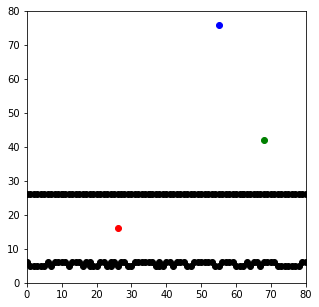

In [23]:
np.random.seed(200)
k = 3
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['longitude'], cluster['neighbourhood'], color='k')
plt.scatter(cluster['latitude'], cluster['neighbourhood'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

*Explain what you observe and what is your conclusion*

### 6. Naive classifier (5 points)
* Construct a naive classifier
* Compare it to all the classifiers you implemented above

*Explain what you do and why*

In [13]:
# your code goes here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

cols = x.columns
num_cols = x._get_numeric_data().columns
num_cols = x[num_cols]


X_train, X_test, y_train, y_test = train_test_split(num_cols, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, y_pred,labels=[1,0])

array([[   0, 2777],
       [   0, 1927]])

*Explain what you observe and what is your conclusion*

### 7. Best possible classifier (25 points)
* Develop the best possible classifier using whatever you have learnt in this class.
* Demonstrate performance in the best possible way to show that it is indeed the best possible classifer. 

If you wish to merge all features into a single feature vector Xn you can follow the code below, assuming that Xnum corresponds to the vector of numerical features, Xcat categorical features, Xtext textual features, and Xpos the neighborhood feature. Change the code below to whatever is appropriate for you.

In [14]:
from scipy import sparse
Xn = sparse.hstack((predictions, predictionsCat, textAcc, labels)).tocsr()

*Explain what you do and why*

Results...
DecisionTree : 0.4540034830713326
Logistic Regression : 0.41780038997290764
RandomForest : 0.3401003924911361
KNeighbours : 0.5446268057008603
SVM : 0.49159886323685864
AdaBoostClassifier : 0.3624234037048672
GradientBoostingClassifier:  0.3232561930050356
Xgboost:  0.32582846344095695
Lasso:  0.47329245100854533
Ridge:  0.3768079572231
BayesianRidge:  0.37677183912055207
ElasticNet:  0.47169046087732314
HuberRegressor:  0.47123209815954786


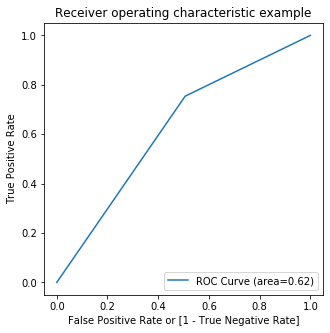

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Logistic Regression :', LogisticRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")


le = LabelEncoder()
finalX = x.apply(le.fit_transform)

prediction_from_model = 0
names = []
scoring = 'accuracy'
X_train, X_test, y_train, y_test = train_test_split( finalX, y, test_size=0.33, random_state=42)
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    prediction_from_model = predictions
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

def plot_roc(actualvalue,probabilityvalue):
    fpr,tpr,thresholds=metrics.roc_curve(actualvalue,probabilityvalue,drop_intermediate=False)
    #Calculate the Area Under Curve Score
    auc_score=metrics.roc_auc_score(actualvalue,probabilityvalue)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC Curve (area=%0.2f)'% auc_score)
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None
plot_roc(y_test,prediction_from_model.round())

*Explain what you observe and what is your conclusion*